# <center> REGRESSION LINEAIRE REGULARISEE

## Table des matières

* [Chapitre 1 : Régression ridge](#chapter1)
    * [1.1 : Régression ridge analytique](#section1_1)
        * [1.1.1 Solver Cholesky et solver Sag](#section1_1_1)
            * [1.1.1.1 Cas linéaire](#section1_1_1_1)
            * [1.1.1.2 Cas polynomial](#section1_1_1_2)
        * [1.1.2 Variations de $\alpha$](#section1_1_2)
            * [1.1.2.1 Cas linéaire](#section1_1_2_1)
            * [1.1.2.2 Cas polynomial](#section1_1_2_1)
    * [1.2 : Régression ridge par descente de gradient stochastique](#section1_2)
        * [1.2.1 Régression ridge par descente de gradient moyenne stochastique : Solver Sag](#section1_2_1)
* [Chapitre 2 : Régression lasso](#chapter2)
    * [2.1 : Avec sklearn.linear_model.Lasso](#section2_1)
        * [2.1.1 Variations de alpha](#section2_1_1)
        * [2.1.2 Cas alpha=0](#section2_1_1)
    * [2.2 : Avec sklearn.linear_model.SGDRegressor](#section2_2)
* [Chapitre 3 : Elastic net](#chapter3)
* [Chapitre 4 : Arrêt précoce](#chapter4)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

Text(0.5, 1.0, "Représentation graphique des données d'entraînement")

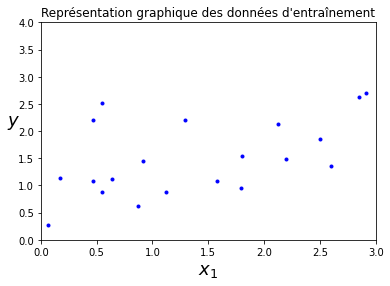

In [2]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 4])
plt.title("Représentation graphique des données d'entraînement")

---
## <center> Chapitre 1 : Régression ridge <a class="anchor" id="chapter1"></a>
---

### 1.1 Régression ridge analytique <a class="anchor" id="section1_1"></a>

#### 1.1.1 Solver Cholesky et solver Sag <a class="anchor" id="section1_1_1"></a>

##### 1.1.1.1 Cas linéaire <a class="anchor" id="section1_1_1_1"></a>

In [3]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

(0.0, 3.0, 0.0, 4.0)

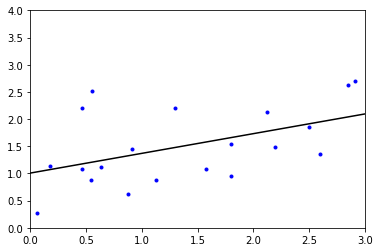

In [4]:
X_new = np.linspace(0, 3, 100).reshape(100, 1)
y_new_regul = ridge_reg.predict(X_new)
plt.plot(X_new, y_new_regul, "k")
plt.plot(X, y, "b.", linewidth=3)
plt.axis([0, 3, 0, 4])

##### 1.1.1.2 Cas polynomial <a class="anchor" id="section1_1_1_2"></a>

(0.0, 3.0, 0.0, 4.0)

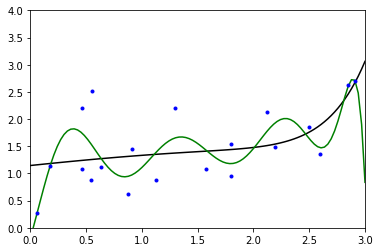

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

model = Ridge(alpha=1, random_state=42)
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", model),
            ])
model.fit(X, y)
y_new_regul2 = model.predict(X_new)

model3 = Ridge(alpha=0, random_state=42)
model3 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", model3),
            ])
model3.fit(X, y)
y_new_regul4 = model3.predict(X_new)

plt.plot(X_new, y_new_regul2, "k")
plt.plot(X_new, y_new_regul4, "g")
plt.plot(X, y, "b.", linewidth=3)
plt.axis([0, 3, 0, 4])

#### 1.1.2 Variation de $\alpha$ <a class="anchor" id="section1_1_2"></a>

La figure suivante présente différents modèles de régression ridge entraînés sur des données linéaires avec différentes valeurs $\alpha$.

##### 1.1.2.1 Cas linéaire <a class="anchor" id="section1_1_2_1"></a>

On a effectué des régressions ridge ordinaires, ce qui conduit à des prédictions linéaires. Notez comme en accroissant $\alpha$ on obtient des prédictions plus lisses, moins extrêmes, plus raisonnables : ceci correspond à une réduction de la variance du modèle, mais à un accroissement de son biais.

Text(0, 0.5, '$y$')

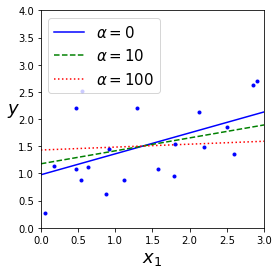

In [6]:
from sklearn.linear_model import LinearRegression

X_new = np.linspace(0, 3, 100).reshape(100, 1)
    
def plot_model(alphas):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        if alpha > 0:
            model = Ridge(alpha, random_state=42) 
            model.fit(X, y)
            y_new_regul = model.predict(X_new)
        else:
            try:
                model = LinearRegression()
                model.fit(X, y)
                y_new_regul = model.predict(X_new)
            except:
                model = LinearRegression(normalize = True)
                model.fit(X, y)
                y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(4,4))
plot_model(alphas=(0, 10, 100))
plt.ylabel("$y$", rotation=0, fontsize=18)

##### 1.1.2.2 Cas polynomial <a class="anchor" id="section1_1_2_2"></a>

Les données ont été tout d’abord étendues en utilisant `PolynomialFeatures(degree=10)`, puis normalisées en utilisant `StandardScaler`, et enfin on a appliqué aux variables résultantes un modèle ridge, correspondant donc à une régression polynomiale avec régularisation ridge.

Text(0, 0.5, '$y$')

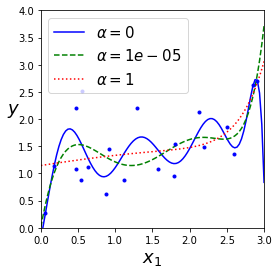

In [7]:
from sklearn.linear_model import LinearRegression

X_new = np.linspace(0, 3, 100).reshape(100, 1)
    
def plot_model_poly(alphas):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
#    for alpha in alphas:
        model = Ridge(alpha, random_state=42)
        model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ]) 
        model.fit(X, y)
        y_new_regul = model.predict(X_new)     
        plt.plot(X_new, y_new_regul, style, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(4,4))
plot_model_poly(alphas=(0, 10**-5, 1))
plt.ylabel("$y$", rotation=0, fontsize=18)

### 1.2 Régression ridge par descente de gradient stochastique <a class="anchor" id="section1_2"></a>

**Remarque.** Dans Scikit-Learn 0.21. les valeurs par défaut `max_iter=1000` and `tol=1e-3`. 

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

L’hyperparamètre `penalty` définit le type de terme de régularisation à utiliser. En spécifiant `"l2"`, vous choisissez d’ajouter à la fonction de coût un terme de régularisation égal à la moitié du carré de la norme $\ell_2$ du vecteur de pondération : c’est simplement la régression ridge.

#### 1.2.1 Régression ridge par descente de gradient moyenne stochastique : solver Sag <a class="anchor" id="section1_2_1"></a>

Vous pouvez aussi utiliser la classe Ridge avec `solver="sag"`. La descente de gradient moyenne stochastique (Stochastic Average GD ou SAG) est une variante de la descente de gradient stochastique SGD. Pour plus de détails, reportez-vous à la présentation de Mark Schmidt et al., University of British Columbia : https://homl.info/12

In [9]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

---
## <center> Chapitre 2 : Régression lasso <a class="anchor" id="chapter2"></a>
---

### 2.1 Avec sklearn.linear_model.Lasso <a class="anchor" id="section2_1"></a>

In [10]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

#### 2.1.1 Variations de alpha <a class="anchor" id="section2_1_1"></a>

c:\users\victor\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


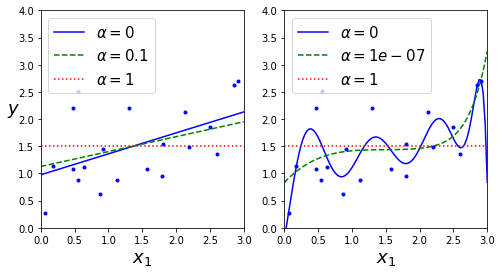

In [11]:
def plot_model_lasso(alphas, degrees):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):  
        if alpha > 0:
            model = Lasso(alpha, random_state=42)
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=degrees, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("lin_reg", model),
            ])
            model.fit(X,y)

        else:
            try:
                model = LinearRegression(normalize=True)
                model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=degrees, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("lin_reg", model),
            ])
                model.fit(X,y)

            except:
                model = LinearRegression()         
                model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=degrees, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("lin_reg", model),
            ])
                model.fit(X,y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.")
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    
        
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model_lasso(alphas=(0, 0.1, 1), degrees=1)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model_lasso(alphas=(0, 10**-7, 1), degrees=10)


Voyez par exemple la ligne à tirets du graphique de droite de la figure 4.18 (avec $\alpha = 10^{-7}$) qui semble quadratique, presque linéaire : tous les coefficients de pondération des variables polynomiales de haut degré sont nuls.

#### 2.1.2 Cas alpha=0 <a class="anchor" id="section2_1_2"></a>

Contrairement à la documentation la fonction `Lasso` ne fonctionne pas avec `alpha=0`.

c:\users\victor\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py:335: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\users\victor\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\users\victor\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.803261558420787, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


(0.0, 3.0, 0.0, 4.0)

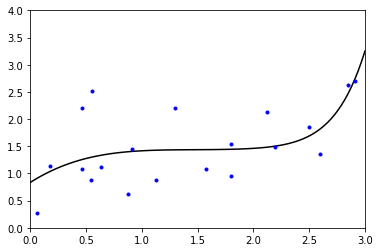

In [12]:
modelz = Lasso(0, random_state=42)
modelz = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", modelz),
            ])
modelz.fit(X, y)
y_new_regulz = modelz.predict(X_new)

plt.plot(X_new, y_new_regulz, "k")
plt.plot(X, y, "b.", linewidth=3)
plt.axis([0, 3, 0, 4])

### 2.2 Avec sklearn.linear_model.SGDRegressor <a class="anchor" id="section2_2"></a>

Remarquez que vous pourriez également utiliser un `SGDRegressor(penalty="l1")`.

In [13]:
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

---
## <center> Chapitre 3 : Régression elastic net <a class="anchor" id="chapter3"></a>
---

In [14]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

---
## <center> Chapitre 4 : Arrêt précoce <a class="anchor" id="chapter4"></a>
---

La figure 4.20 présente un modèle complexe (ici un modèle de régression polynomiale de haut degré) entraîné à l’aide d’une descente de gradient ordinaire : au fur et à mesure des cycles ou "époques", l’algorithme apprend et son erreur de prédiction (RMSE) sur le jeu d’apprentissage décroît avec son erreur de prédiction sur le jeu de validation. Cependant, au bout d’un moment l’erreur de validation cesse de décroître et commence même à augmenter à nouveau. Ceci indique que le modèle a commencé à surajuster les données d’entraînement.

Text(0.5, 1.0, 'Représentation graphique des données')

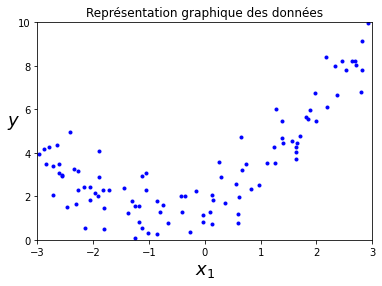

In [20]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("Représentation graphique des données")

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [25]:
from sklearn.metrics import mean_squared_error
from copy import deepcopy


poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf") #Initialise à + infini 
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)


Notez que si le SGDRegressor est créé avec l’option `warm_start=True`, alors sa méthode `fit()`, lorsqu’elle est appelée, reprend l’entraînement là où il a été interrompu au lieu de recommencer entièrement.